In [1]:
import numpy as np 
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
leftCones = cv2.imread('leftCones.png',0)
rightCones = cv2.imread('rightCones.png',0)
leftTeddy = cv2.imread('leftTeddy.png',0)
rightTeddy = cv2.imread('rightTeddy.png',0)

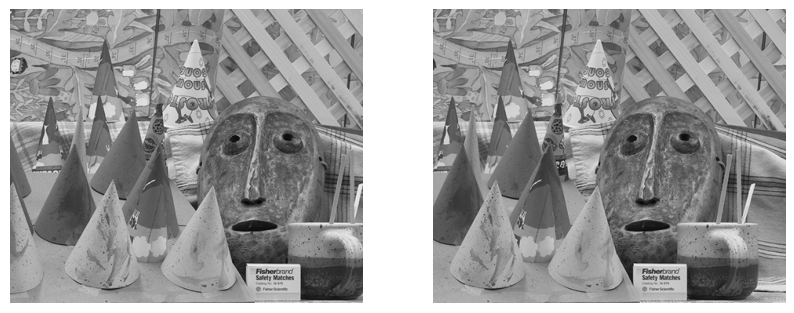

In [3]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(leftCones,'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(rightCones,'gray')
plt.axis('off')
plt.show()

In [4]:
# Defining a function to calculate and show Disparity for the Cones Image
def ShowDisparityCones(bSize):
    # Initialize the stereo block matching object
    stereo = cv2.StereoBM_create(numDisparities = 64, blockSize = bSize)
    
    # Computing the disparities
    disparityCones = stereo.compute(leftCones,rightCones)
    
    # Normalize the image for representation
    min = disparityCones.min()
    max = disparityCones.max()
    disparityCones = np.uint8(255 * (disparityCones - min) / (max - min))
    
    # Plotting the result
    return disparityCones


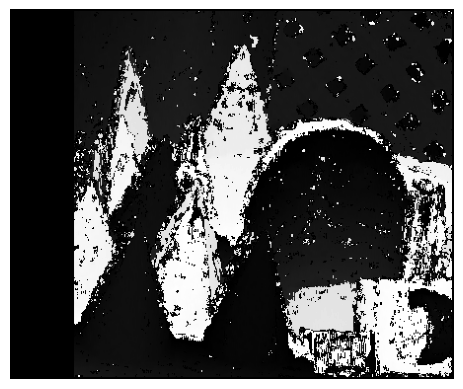

In [5]:
# Plotting the result
# Note that the window size of the block should be odd
# Therefore the parameter of bSize should be odd
resultCones = ShowDisparityCones(5)
plt.imshow(resultCones,'gray')
plt.axis('off')
plt.show()

In [6]:
# Comparing the disparity maps
def ComparingDisparityMaps(disp1,disp2):
    # Checking the dimensions of the disparity maps
    if disp1.shape != disp2.shape:
        raise ValueError("Disparity maps should have same dimensions.")

    # Calculating the image difference 
    DiffImage = cv2.absdiff(disp1,disp2)

    # Calculating the Root Means Squared Error
    rsme = np.sqrt(np.mean(DiffImage))

    # Calculating the mean absolute error
    mae = np.mean(np.abs(DiffImage))

    return DiffImage, rsme, mae

In [7]:
# Loading the disparity maps
disp1 = cv2.imread("Right_Disparity_Cones.png",cv2.IMREAD_GRAYSCALE)
disp2 = resultCones

In [8]:
# Comparing the disparity maps
DiffImage, rsme, mae = ComparingDisparityMaps(disp1,disp2)

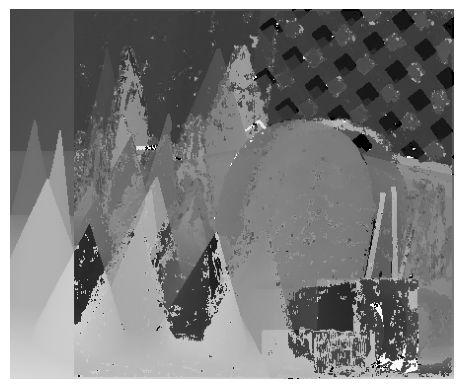

RMSE: 10.609273092703173
MAE 112.55667555555556


In [9]:
# Showing the Disparity Maps
plt.imshow(DiffImage,'gray')
plt.axis('off')
plt.show()
# Printing the error metrics
print("RMSE:",rsme)
print("MAE",mae)

(-0.5, 449.5, 374.5, -0.5)

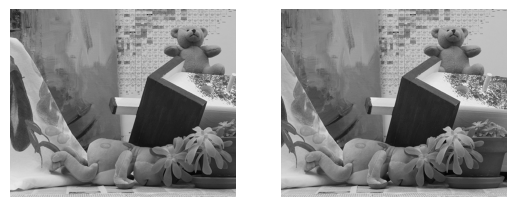

In [10]:
plt.subplot(1,2,1)
plt.imshow(leftTeddy,'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(rightTeddy,'gray')
plt.axis('off')

In [11]:
# Defining a function to calculate and show Disparity for the Teddy Image
def ShowDisparityTeddy(bSize):
    # Initialize the stereo block matching object
    stereo = cv2.StereoBM_create(numDisparities = 64, blockSize = bSize)
    
    # Computing the disparities
    disparityTeddy = stereo.compute(leftTeddy,rightTeddy)
    
    # Normalize the image for representation
    min = disparityTeddy.min()
    max = disparityTeddy.max()
    disparityTeddy = np.uint8(255 * (disparityTeddy - min) / (max - min))
    
    # Plotting the result
    return disparityTeddy


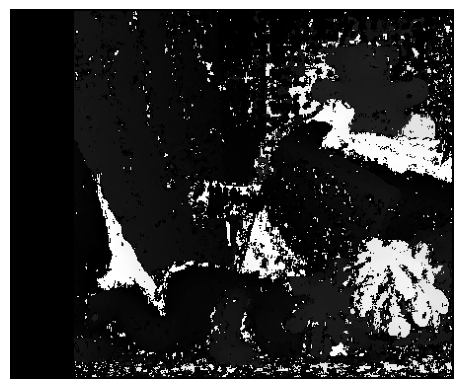

In [12]:
# Plotting the result
# Note that the window size of the block should be odd
# Therefore the parameter of bSize should be odd
resultTeddy = ShowDisparityTeddy(5)
plt.imshow(resultTeddy,'gray')
plt.axis('off')
plt.show()

In [13]:
# Loading the disparity maps
disp1 = cv2.imread("Right_Disparity_Teddy.png",cv2.IMREAD_GRAYSCALE)
disp2 = resultTeddy

In [14]:
# Comparing the disparity maps
DiffImage, rsme, mae = ComparingDisparityMaps(disp1,disp2)

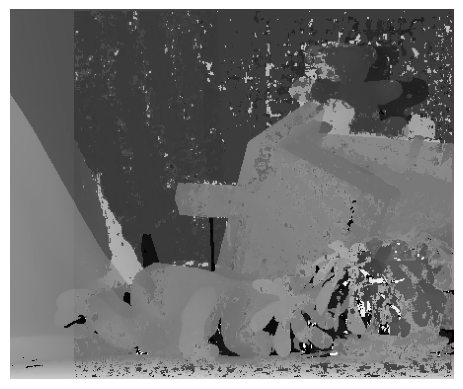

RMSE: 10.036267861739871
MAE 100.72667259259259


In [15]:
# Showing the Disparity Maps
plt.imshow(DiffImage,'gray')
plt.axis('off')
plt.show()
# Printing the error metrics
print("RMSE:",rsme)
print("MAE",mae)